In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

In [ ]:
cifer10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifer10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 21s 0us/step


In [ ]:
x_test, x_train = x_test/255.0,x_train/255.0

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2), strides=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 29, 32)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(1024))
model.add(layers.Dense(10))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 29, 29, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 27, 27, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 46656)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │      47,776,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 47,806,410 (182.37 MB)

 Trainable params: 47,806,410 (182.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.11763632, -0.02581062,  0.02155159,  0.03590941,  0.08911008,
        -0.08875009, -0.01710952, -0.14407152,  0.00714944, -0.14214574]],
      dtype=float32)

In [ ]:
tf.nn.softmax(predictions).numpy()

array([[0.09209111, 0.10094786, 0.10584399, 0.10737465, 0.11324173,
        0.09479007, 0.10183005, 0.08968856, 0.10433053, 0.08986145]],
      dtype=float32)

In [ ]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)

In [ ]:
loss_fn(y_train[:1], predictions).numpy()

2.28445

In [ ]:
model.compile(optimizer='adam' , loss=loss_fn, metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 17ms/step - accuracy: 0.3859 - loss: 1.9497 - val_accuracy: 0.5044 - val_loss: 1.4156
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 14ms/step - accuracy: 0.5803 - loss: 1.1786 - val_accuracy: 0.6081 - val_loss: 1.1148
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.6512 - loss: 0.9951 - val_accuracy: 0.6131 - val_loss: 1.1243
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.6996 - loss: 0.8484 - val_accuracy: 0.6085 - val_loss: 1.1365
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.7571 - loss: 0.6932 - val_accuracy: 0.6010 - val_loss: 1.2204
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.8052 - loss: 0.5636 - val_accuracy: 0.6032 - val_loss: 1.2719
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 13ms/step - accuracy: 0.8413 - loss: 0.4472 - val_accuracy: 0.6048 - val_loss: 1.5204
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.8725 -

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - 3ms/step - accuracy: 0.5678 - loss: 2.2787

Test accuracy: 0.567799985408783


313/313 - 1s - 3ms/step - accuracy: 0.5678 - loss: 2.2787


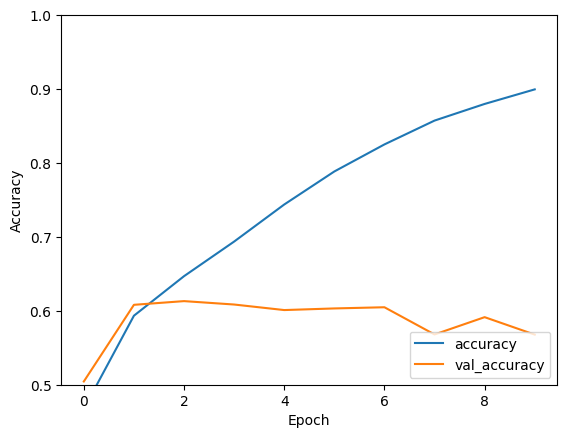

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test[:10])
predictions[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step


array([2.28371820e-04, 2.72452644e-10, 1.42828058e-02, 9.60183442e-01,
       5.47862089e-10, 3.77492630e-03, 1.63386896e-04, 1.57375471e-05,
       2.13514548e-02, 1.00503375e-08], dtype=float32)

In [ ]:
print(np.argmax(predictions, axis = 1))
print(y_test[:10])

[3 8 0 0 6 6 1 6 3 1]
[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]]


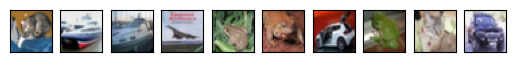

In [ ]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(x_test[i], cmap=plt.cm.binary)
plt.show()